In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Task 1: Web Scraping


In [3]:
url = "http://books.toscrape.com/"
response = requests.get(url)

# Theory: 200 is the 'Success' code. 404 means 'Not Found'.
print(f"Status Code: {response.status_code}")

Status Code: 200


In [4]:
# 'html.parser' tells BeautifulSoup to read the text as HTML code
soup = BeautifulSoup(response.text, 'html.parser')

# We find all <article> tags with the class 'product_pod'
# Theory: Classes are labels used by developers to style groups of similar items.
books = soup.find_all('article', class_='product_pod')

book_list = []
for book in books:
    # Navigate the 'DOM' tree: find the 'a' tag inside 'h3' to get the title
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text

    book_list.append({"Title": title, "Price": price})

# Create your custom dataset!
df = pd.DataFrame(book_list)
df.head()

,Title,Price
0,A Light in the Attic,Â£51.77
1,Tipping the Velvet,Â£53.74
2,Soumission,Â£50.10
3,Sharp Objects,Â£47.82
4,Sapiens: A Brief History of Humankind,Â£54.23


In [5]:

df.to_csv("books_data.csv", index=False)
print("Task 1 complete: 'books_data.csv' has been created!")

Task 1 complete: 'books_data.csv' has been created!


# Task 2: Exploratory Data Analysis (EDA)


Dataset Shape: (20, 2)

First 5 rows:
                                    Title    Price
0                   A Light in the Attic  Â£51.77
1                     Tipping the Velvet  Â£53.74
2                             Soumission  Â£50.10
3                          Sharp Objects  Â£47.82
4  Sapiens: A Brief History of Humankind  Â£54.23

Data Types:
 Title    object
Price    object
dtype: object

Success! Prices are now numbers.
           Price
count  20.000000
mean   38.048500
std    15.135231
min    13.990000
25%    22.637500
50%    41.380000
75%    51.865000
max    57.250000


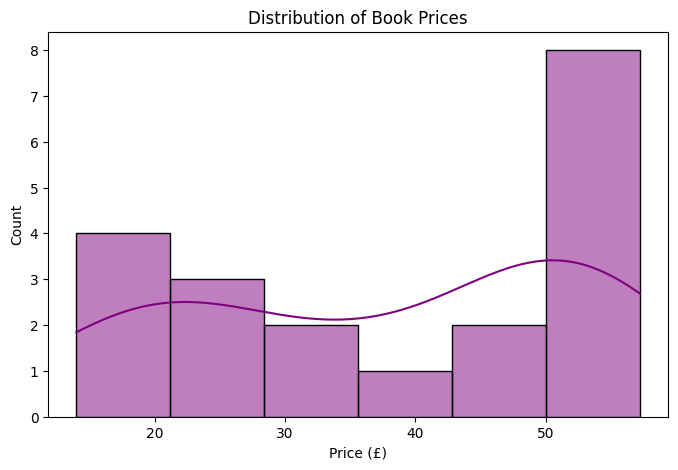

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- STEP 1: LOAD & INSPECT ---
# Theory: Before cleaning, you must know the data's 'shape' and 'types'.
df = pd.read_csv("books_data.csv")
print("Dataset Shape:", df.shape) # Rows and Columns
print("\nFirst 5 rows:\n", df.head()) # Preview
print("\nData Types:\n", df.dtypes) # Are prices 'objects' (text) or 'floats' (numbers)?

# --- STEP 2: DATA CLEANING (Fixed Version) ---
# Theory: Use regex=True to find any character that isn't a digit or dot and remove it.
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# --- STEP 3: DESCRIPTIVE STATISTICS ---
print("\nSuccess! Prices are now numbers.")
print(df.describe())

# --- STEP 4: UNIVARIATE VISUALIZATION ---
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, color='purple')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.show()

# Task 3: Data Visualization


/tmp/ipython-input-2820704321.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Price', y='Title', data=top_10, palette='viridis')


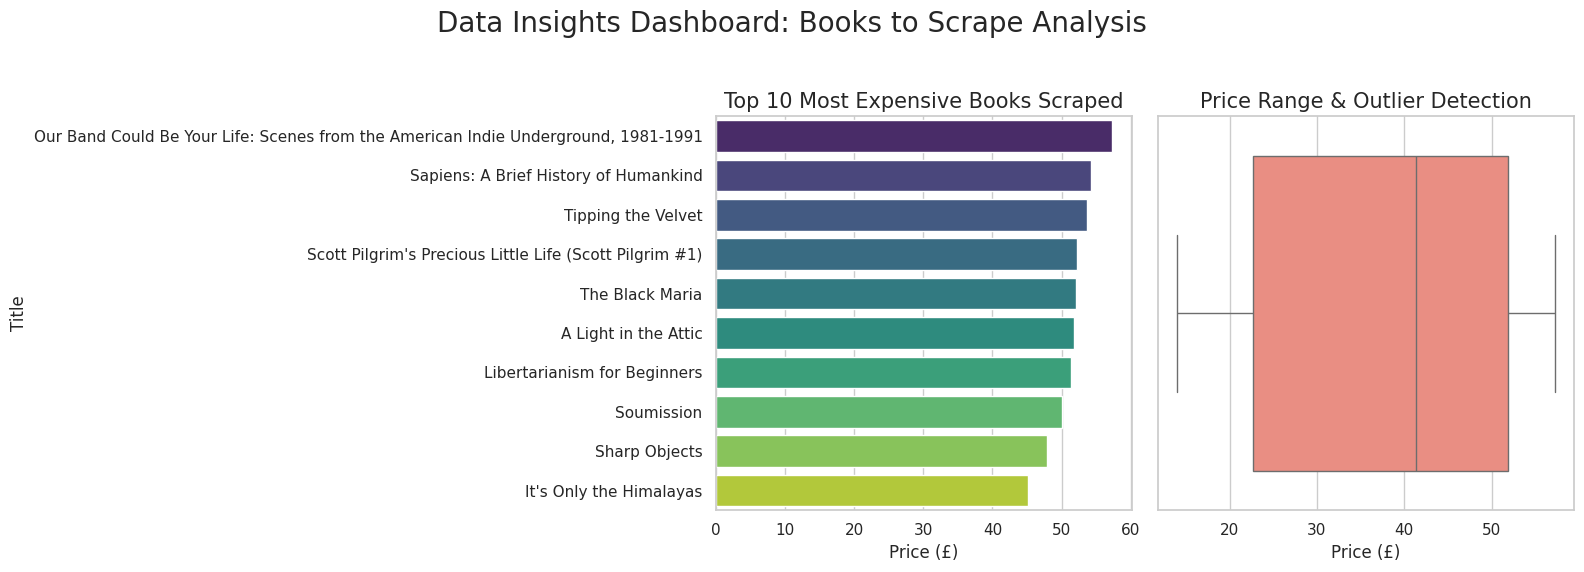

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- PREPARATION ---
# Set a professional visual theme
sns.set_theme(style="whitegrid")

# Create a 'Figure' with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- CHART 1: BAR CHART (Comparison) ---
# Theory: We compare the average price of books to identify the most expensive ones.
top_10 = df.nlargest(10, 'Price')
sns.barplot(ax=axes[0], x='Price', y='Title', data=top_10, palette='viridis')
axes[0].set_title('Top 10 Most Expensive Books Scraped', fontsize=15)
axes[0].set_xlabel('Price (£)')

# --- CHART 2: BOX PLOT (Distribution) ---
# Theory: A box plot shows the median, quartiles, and outliers of price.
sns.boxplot(ax=axes[1], x='Price', data=df, color='salmon')
axes[1].set_title('Price Range & Outlier Detection', fontsize=15)
axes[1].set_xlabel('Price (£)')

# Add a main title to the whole dashboard
plt.suptitle('Data Insights Dashboard: Books to Scrape Analysis', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Task 4: Sentiment Analysis



In [9]:
# Install the library
!pip install textblob

from textblob import TextBlob

First 10 Titles with their Sentiment:
                                               Title Sentiment
0                               A Light in the Attic  Positive
1                                 Tipping the Velvet   Neutral
2                                         Soumission   Neutral
3                                      Sharp Objects  Negative
4              Sapiens: A Brief History of Humankind   Neutral
5                                    The Requiem Red   Neutral
6  The Dirty Little Secrets of Getting Your Dream...  Negative
7  The Coming Woman: A Novel Based on the Life of...  Negative
8  The Boys in the Boat: Nine Americans and Their...  Positive
9                                    The Black Maria  Negative


/tmp/ipython-input-1836306500.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='pastel')


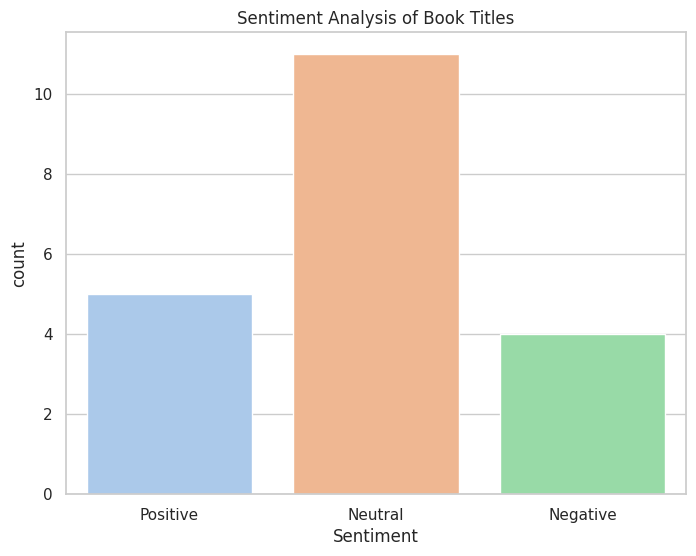

In [10]:
# --- TASK 4: SENTIMENT ANALYSIS ---

# 1. Define a function to calculate sentiment
def get_sentiment(text):
    # TextBlob gives a 'polarity' score between -1 (Negative) and 1 (Positive)
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# 2. Apply the function to our Book Titles
df['Sentiment'] = df['Title'].apply(get_sentiment)

# 3. Show the results
print("First 10 Titles with their Sentiment:")
print(df[['Title', 'Sentiment']].head(10))

# 4. Visualize the findings (The "Social Insight")
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='pastel')
plt.title('Sentiment Analysis of Book Titles')
plt.show()